# Import library

In [12]:
import os
import re
import csv
import json
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

sns.set(style='darkgrid')

# Load data

In [13]:
match_path = "matches.csv"

In [14]:
player_path = "player_all_season.csv"

In [15]:
match_df = pd.read_csv(match_path)
match_df.head()

,match_id,season,date,ground,duration,outcome,h_name,h_team_id,h_score,h_formation,...,a_att_obp_goal,h_att_lg_right,a_att_pen_miss,h_att_pen_miss,a_att_lg_left,h_att_obox_own_goal,a_rescinded_red_card,a_att_lg_right,a_att_obox_own_goal,h_att_pen_post
0,93328,2023/24,"Sun 13 Aug 2023, 14:00 BST",Gtech Community Stadium,5700,D,Brentford,130,2,5-3-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93326,2023/24,"Sat 12 Aug 2023, 17:30 BST",St. James' Park,5820,H,Newcastle United,23,5,4-3-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93325,2023/24,"Sat 12 Aug 2023, 15:00 BST",Goodison Park,5820,A,Everton,7,0,4-4-1-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93327,2023/24,"Sat 12 Aug 2023, 15:00 BST",Bramall Lane,5760,A,Sheffield United,18,0,3-4-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93323,2023/24,"Sat 12 Aug 2023, 15:00 BST",Vitality Stadium,5820,D,Bournemouth,127,1,4-2-3-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
player_df = pd.read_csv(player_path)
player_df.drop('Unnamed: 0', axis=1, inplace=True)
player_df= player_df.replace(-1, 0)
player_df= player_df.replace("-1", None)
player_df.head()


,id,playerId,name,season,position,shirtNum,positionInfo,country,birth,age,...,att_lg_left,cross_not_claimed,dive_catch,att_obp_goal,att_pen_post,rescinded_red_card,total_distance_in_m,formation_place,att_rf_miss,att_lf_miss
0,54760.0,344441.0,Matt Turner,2022-23,G,1.0,Goalkeeper,United States,1994,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13559.0,348160.0,Axel Tuanzebe,2022-23,D,40.0,Centre Central Defender,England,1997,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51484.0,324077.0,Antef Tsoungui,2022-23,D,46.0,Centre Central Defender,Belgium,2002,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16006.0,187644.0,Kostas Tsimikas,2022-23,D,21.0,Left Full Back,Greece,1996,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54831.0,343519.0,Auston Trusty,2022-23,D,5.0,Centre Central Defender,United States,1998,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
list(match_df.columns)

['match_id',
 'season',
 'date',
 'ground',
 'duration',
 'outcome',
 'h_name',
 'h_team_id',
 'h_score',
 'h_formation',
 'h_players',
 'h_possession_percentage',
 'h_backward_pass',
 'h_accurate_pass',
 'h_touches',
 'h_total_back_zone_pass',
 'h_total_pass',
 'h_accurate_back_zone_pass',
 'h_final_third_entries',
 'h_open_play_pass',
 'h_successful_final_third_passes',
 'h_total_cross_nocorner',
 'h_rightside_pass',
 'h_won_tackle',
 'h_total_cross',
 'h_total_contest',
 'h_total_final_third_passes',
 'h_fwd_pass',
 'h_leftside_pass',
 'h_long_pass_own_to_opp',
 'h_put_through',
 'h_poss_won_att_3rd',
 'h_total_chipped_pass',
 'h_total_fwd_zone_pass',
 'h_total_long_balls',
 'h_accurate_fwd_zone_pass',
 'h_total_tackle',
 'h_crosses_18yard',
 'h_blocked_pass',
 'h_won_contest',
 'h_ball_recovery',
 'h_poss_lost_all',
 'h_duel_won',
 'h_poss_lost_ctrl',
 'h_passes_right',
 'h_pen_area_entries',
 'h_successful_put_through',
 'h_touches_in_opp_box',
 'h_aerial_won',
 'h_total_flick_on'

In [18]:
list(player_df.columns)

['id',
 'playerId',
 'name',
 'season',
 'position',
 'shirtNum',
 'positionInfo',
 'country',
 'birth',
 'age',
 'accurate_back_zone_pass',
 'accurate_chipped_pass',
 'accurate_corners_intobox',
 'accurate_cross',
 'accurate_cross_nocorner',
 'accurate_flick_on',
 'accurate_freekick_cross',
 'accurate_fwd_zone_pass',
 'accurate_long_balls',
 'accurate_pass',
 'accurate_pull_back',
 'accurate_throws',
 'aerial_lost',
 'aerial_won',
 'appearances',
 'attempted_tackle_foul',
 'attempts_conceded_ibox',
 'attempts_conceded_obox',
 'attempts_ibox',
 'attempts_obox',
 'att_assist_openplay',
 'att_assist_setplay',
 'att_bx_centre',
 'att_bx_left',
 'att_corner',
 'att_hd_target',
 'att_hd_total',
 'att_ibox_blocked',
 'att_ibox_miss',
 'att_ibox_target',
 'att_lf_target',
 'att_lf_total',
 'att_miss_high_right',
 'att_obox_blocked',
 'att_obx_centre',
 'att_openplay',
 'att_sv_low_centre',
 'att_sv_low_left',
 'backward_pass',
 'ball_recovery',
 'big_chance_created',
 'big_chance_missed',
 'b

# Match EDA

## Home-based ratio

Home Win: 838
Home Draw: 432
Home Lose: 630


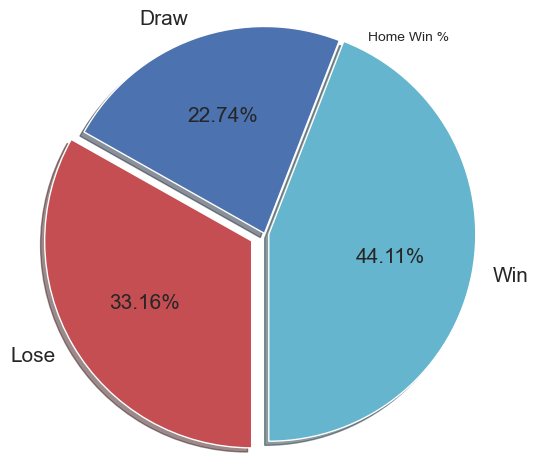

In [19]:
# Ensure counts are non-zero
homewin = len(match_df.loc[match_df['h_score'] > match_df['a_score']])
homedraw = len(match_df.loc[match_df['h_score'] == match_df['a_score']])
homelose = len(match_df.loc[match_df['h_score'] < match_df['a_score']])

print("Home Win:", homewin)
print("Home Draw:", homedraw)
print("Home Lose:", homelose)

# If all values are zero, skip plotting
if homewin == 0 and homedraw == 0 and homelose == 0:
    print("No data available to plot.")
else:
    # Updated pie chart settings
    textprops = {"fontsize": 15}
    explode = [0.03, 0, 0.1]  # Updated for 3 sections
    colors = ["c", "b", "r"]  # Only three colors for three sections

    # Plot pie chart
    plt.pie(
        [homewin, homedraw, homelose],
        labels=['Win', 'Draw', 'Lose'],
        explode=explode,  # To slice the particular section
        colors=colors,    # Color of each section
        autopct="%0.2f%%", # Show data in percentage with 2 decimal points
        shadow=True,      # Show shadow of pie chart
        radius=1.4,       # Radius to increase or decrease the size of pie chart
        startangle=270,   # Start angle of first section
        textprops=textprops
    )
    plt.title('Home Win %', fontsize=10, loc='right')
    plt.show()

## Goal position ratio 23/24

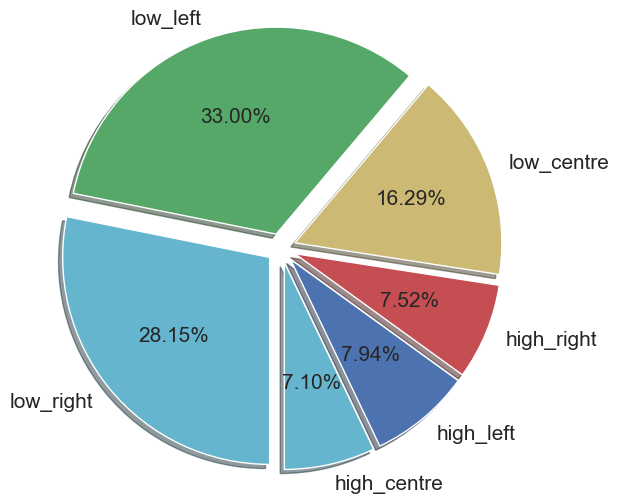

In [20]:
import matplotlib.pyplot as plt
def goalPosition_season(season):
    goal = match_df.loc[match_df['season'] == season]
    goal = goal[['h_att_goal_high_centre', 'h_att_goal_low_centre',
                'h_att_goal_high_left', 'h_att_goal_high_right',
                'h_att_goal_low_left', 'h_att_goal_low_right',
                'a_att_goal_high_centre', 'a_att_goal_low_centre',
                'a_att_goal_high_left', 'a_att_goal_high_right',
                'a_att_goal_low_left', 'a_att_goal_low_right']].sum()
    high_centre = goal['a_att_goal_high_centre'] + goal['h_att_goal_high_centre']
    high_left = goal['a_att_goal_high_left'] + goal['h_att_goal_high_left']
    high_right = goal['a_att_goal_high_right'] + goal['h_att_goal_high_right']
    low_centre = goal['a_att_goal_low_centre'] + goal['h_att_goal_low_centre']
    low_left = goal['a_att_goal_low_left'] + goal['h_att_goal_low_left']
    low_right = goal['a_att_goal_low_right'] + goal['h_att_goal_low_right']

    explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    colors = ["c", 'b', 'r', 'y', 'g']
    plt.pie([high_centre, high_left, high_right, low_centre, low_left, low_right],labels=['high_centre', 'high_left', 'high_right', 'low_centre', 'low_left', 'low_right'],
            explode=explode,
            colors=colors,
            autopct="%0.2f%%",
            shadow=True,
            radius=1.4,
            startangle=270,
            textprops={"fontsize": 15}  # Fix typo here
            )
    plt.show()

goalPosition_season('2023/24')

# Player EDA

In [23]:
des = player_df.describe()

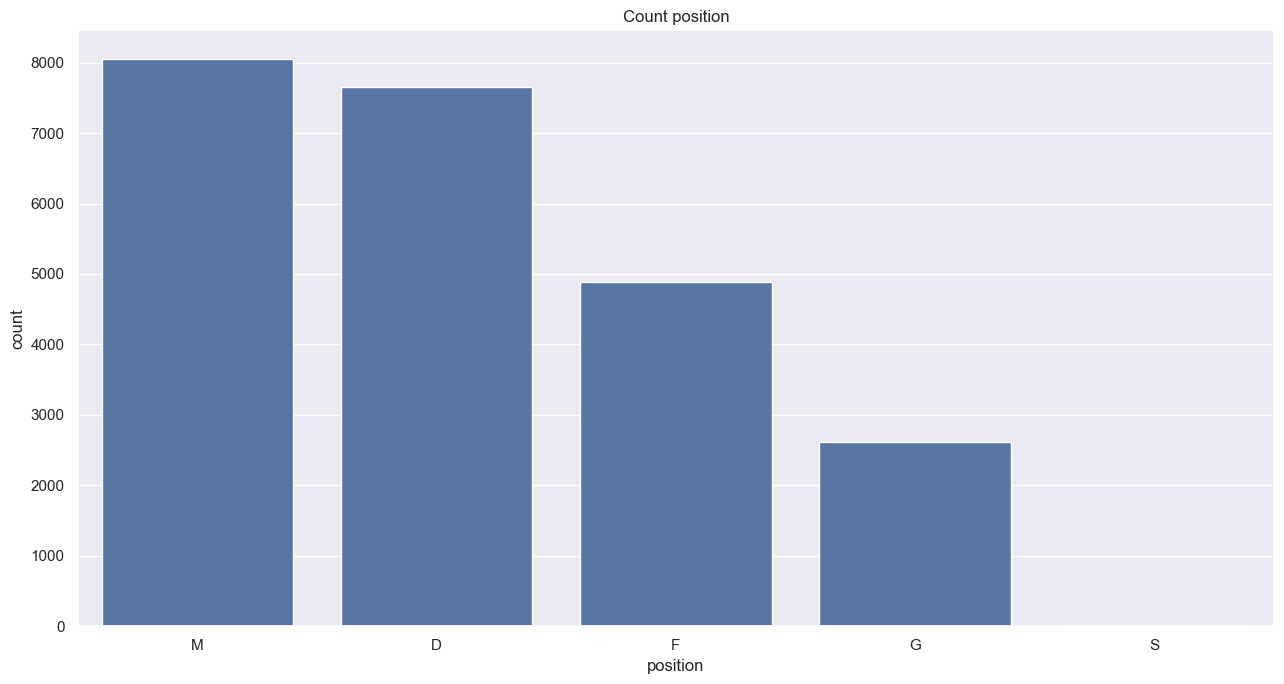

In [ ]:
# postion bar chart
plt.figure(figsize=(13, 7))
plt.title('Count position')
sns.countplot(data=player_df, x='position', order = player_df['position'].value_counts().index)
plt.tight_layout()
plt.show()

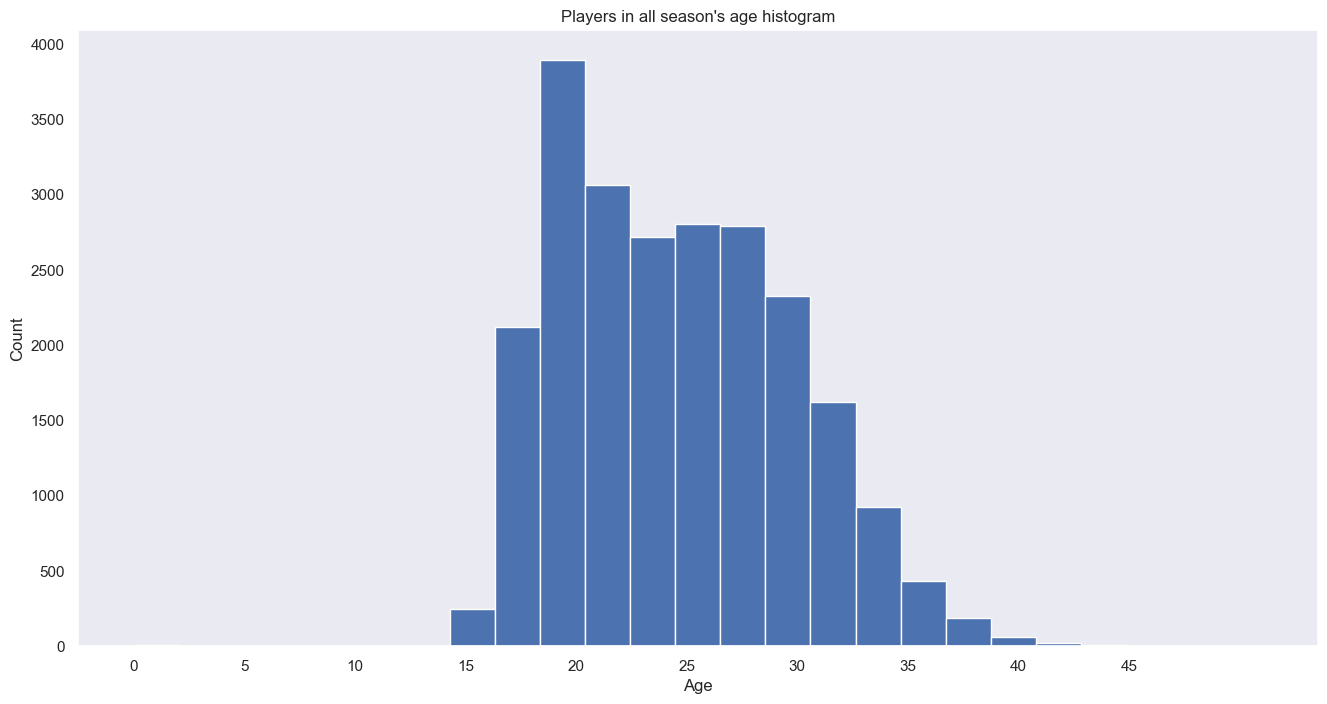

In [25]:
# Players age
player_df['age'].hist(figsize=(16, 8), bins=25, grid=False)
plt.xticks(np.arange(0, 50, step=5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Players in all season\'s age histogram')
plt.show()

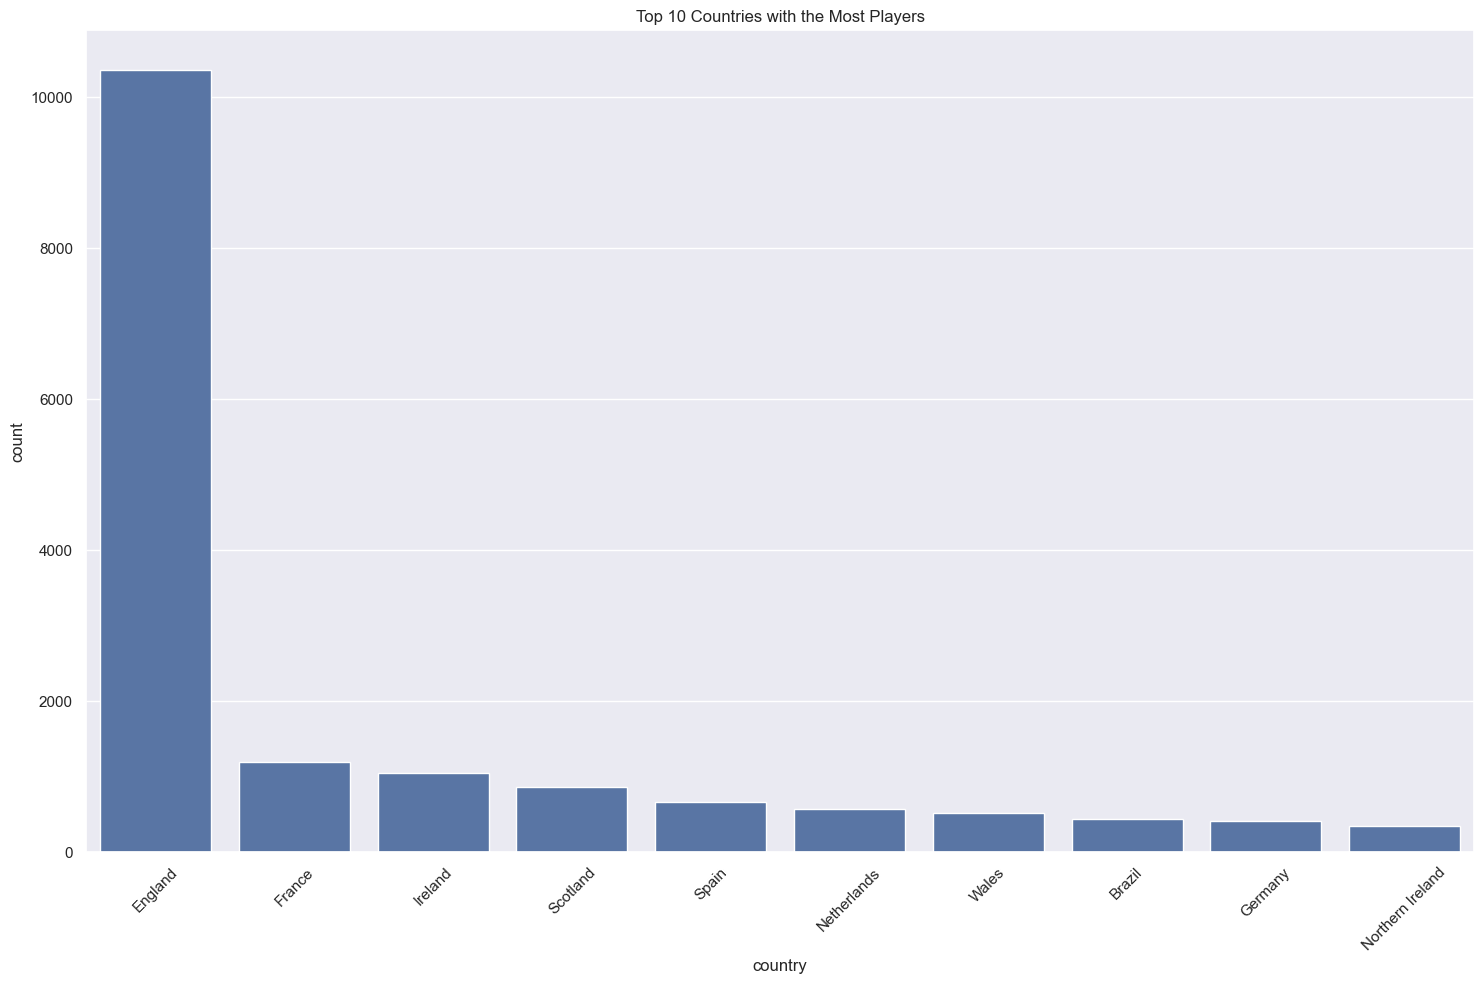

In [26]:
# Top 10 largest countries
top_10_countries = player_df['country'].value_counts().head(10).index

plt.figure(figsize=(15, 10))
plt.title('Top 10 Countries with the Most Players')

sns.countplot(data=player_df[player_df['country'].isin(top_10_countries)], 
              x='country', 
              order=player_df['country'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

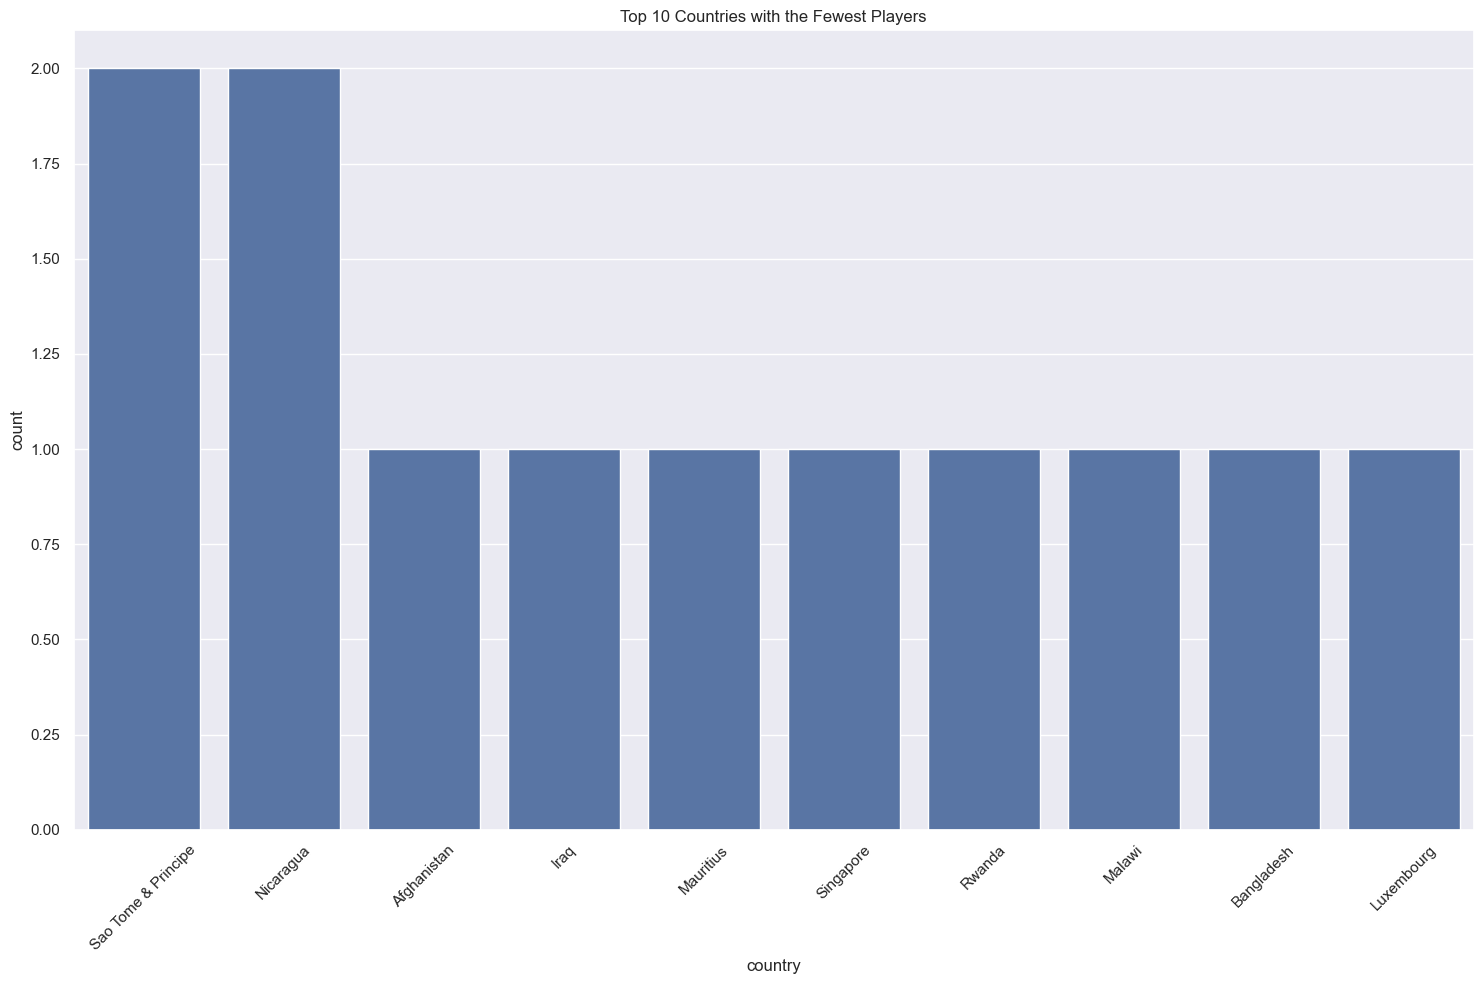

In [27]:
# Top 10 smallest countries
bottom_10_countries = player_df['country'].value_counts().tail(10).index

plt.figure(figsize=(15, 10))
plt.title('Top 10 Countries with the Fewest Players')

sns.countplot(data=player_df[player_df['country'].isin(bottom_10_countries)], 
              x='country', 
              order=player_df['country'].value_counts().tail(10).index)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
def get_n_top_player_with_the_most_x(n, x, get_top=True):
    top_n_players_with_the_most_x = player_df.sort_values(by=[x], ascending=False).head(n)
    top_n_players_with_the_most_x.plot.bar(x='name', y=x, figsize=(n,10), color=sns.color_palette("magma"))
    plt.xticks(rotation=90)
    plt.title('Top {} players with the most {}'.format(n, x))
    plt.ylabel(x)
    plt.show()

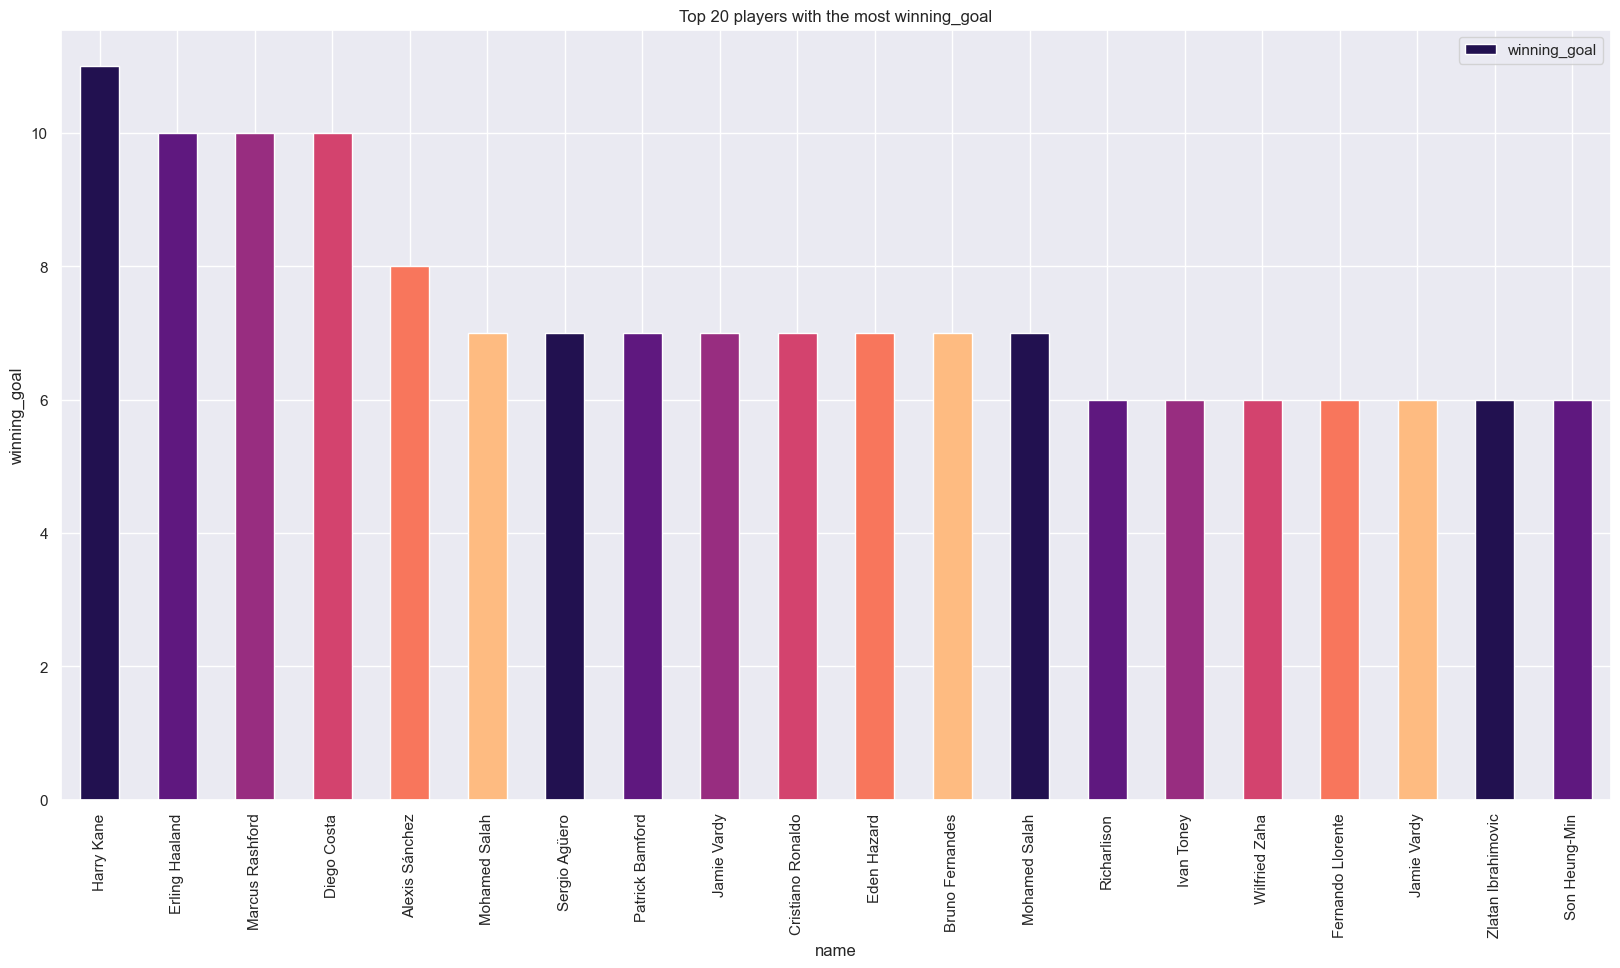

In [29]:
get_n_top_player_with_the_most_x(n=20, x= 'winning_goal',)

# Position EDA

In [32]:
player_df.dropna(subset='position', inplace=True)
player_df = player_df.loc[player_df['position'] != 'S']
player_df.fillna(0, inplace=True)
player_df

,id,playerId,name,season,position,shirtNum,positionInfo,country,birth,age,...,att_lg_left,cross_not_claimed,dive_catch,att_obp_goal,att_pen_post,rescinded_red_card,total_distance_in_m,formation_place,att_rf_miss,att_lf_miss
0,54760.0,344441.0,Matt Turner,2022-23,G,1.0,Goalkeeper,United States,1994,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13559.0,348160.0,Axel Tuanzebe,2022-23,D,40.0,Centre Central Defender,England,1997,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51484.0,324077.0,Antef Tsoungui,2022-23,D,46.0,Centre Central Defender,Belgium,2002,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16006.0,187644.0,Kostas Tsimikas,2022-23,D,21.0,Left Full Back,Greece,1996,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54831.0,343519.0,Auston Trusty,2022-23,D,5.0,Centre Central Defender,United States,1998,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23229,463.0,445.0,Bradley Allen,1992-93,F,0.0,Forward,England,1971,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23230,526.0,506.0,Derek Allan,1992-93,D,0.0,Defender,Scotland,1974,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23231,611.0,1478.0,Steve Agnew,1992-93,M,0.0,Midfielder,England,1965,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23232,3.0,3.0,Tony Adams,1992-93,D,0.0,Defender,England,1966,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
player_df.loc[player_df["season"]=="2022-23"]

,id,playerId,name,season,position,shirtNum,positionInfo,country,birth,age,...,att_lg_left,cross_not_claimed,dive_catch,att_obp_goal,att_pen_post,rescinded_red_card,total_distance_in_m,formation_place,att_rf_miss,att_lf_miss
0,54760.0,344441.0,Matt Turner,2022-23,G,1.0,Goalkeeper,United States,1994,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13559.0,348160.0,Axel Tuanzebe,2022-23,D,40.0,Centre Central Defender,England,1997,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51484.0,324077.0,Antef Tsoungui,2022-23,D,46.0,Centre Central Defender,Belgium,2002,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16006.0,187644.0,Kostas Tsimikas,2022-23,D,21.0,Left Full Back,Greece,1996,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54831.0,343519.0,Auston Trusty,2022-23,D,5.0,Centre Central Defender,United States,1998,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9199.0,286397.0,Adam Armstrong,2022-23,F,9.0,Centre Striker,England,1997,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,13286.0,289629.0,Tammy Abraham,2022-23,F,9.0,Centre Striker,England,1997,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,51536.0,345808.0,Terry Ablade,2022-23,F,12.0,Centre Striker,Ghana,2001,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,117754.0,341886.0,Zach Abbott,2022-23,D,0.0,Defender,England,2006,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
player_df['position'].unique()

array(['G', 'D', 'F', 'M'], dtype=object)

In [35]:
list(player_df['positionInfo'].unique())

['Goalkeeper',
 'Centre Central Defender',
 'Left Full Back',
 'Forward',
 'Right Full Back',
 'Right Winger',
 'Left/Right Winger',
 'Centre Central Midfielder',
 'Centre Striker',
 'Midfielder',
 'Left/Centre/Right Attacking Midfielder',
 'Centre Defensive Midfielder',
 'Defender',
 'Full Back',
 'Left/Centre/Right Second Striker',
 'Left Winger',
 'Centre Attacking Midfielder',
 'Right Wing Back',
 'Central Defender',
 'Left/Centre/Right Winger',
 'Central Midfielder',
 'Left/Centre Attacking Midfielder',
 'Centre/Right Full Back',
 'Striker',
 'Left/Centre Central Defender',
 'Left/Centre/Right Striker',
 'Centre/Right Attacking Midfielder',
 'Left/Centre Second Striker',
 'Centre/Right Central Midfielder',
 'Attacking Midfielder',
 'Defensive Midfielder',
 'Left/Centre/Right Central Midfielder',
 'Left/Right Second Striker',
 'Winger',
 'Left/Right Full Back',
 'Left/Centre/Right Central Defender',
 'Centre Second Striker',
 'Second Striker',
 'Left/Centre Central Midfielder',
 'C

In [36]:
def scatter_plot_on_position(x, y, filter_type='Season-Season', season= "2022-23", position_info=False):
    data_df = player_df
    data_df = data_df[["id", x,y, "position", 'positionInfo']].groupby(["id","position", 'positionInfo']).sum()
    if position_info == False:
        hue = 'position'
        hue_order = ['D', 'M', 'G', 'F']
    else:
        hue = 'positionInfo'
        hue_order = None
        plt.figure(figsize=(20, 7))
        # plt.legend(loc='')

    if filter_type == 'One Season':  
        sns.scatterplot(player_data.loc[player_data['season'] == season], x=x, y=y, hue=hue, hue_order=hue_order)
        plt.show()
        return
    elif filter_type == 'Season-Season':
        sns.scatterplot(data_df, x=x, y=y, hue=hue, hue_order=hue_order)
        plt.show()
        return
    else:
        raise Exception()

    # plt.show()

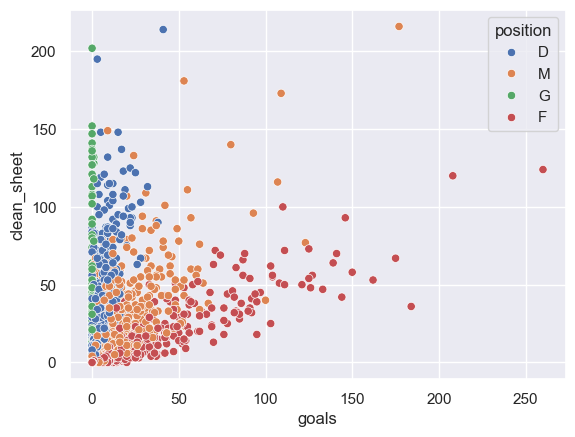

In [37]:
scatter_plot_on_position('goals', 'clean_sheet')

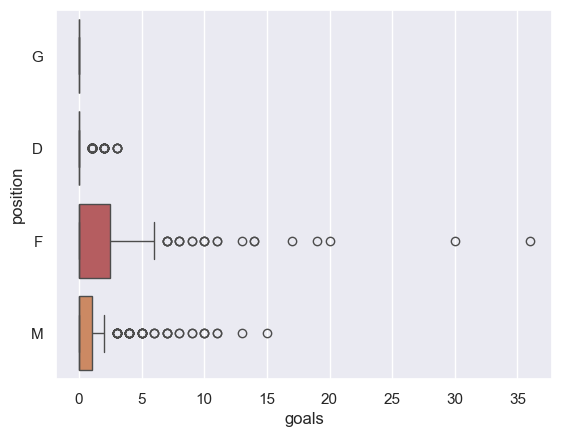

In [39]:
def box_plot_on_position(x, filter_type='Season-Season', season='2022-23', position_info=False):
    data_df = player_df
    data_df = data_df[["id", x, "position", 'positionInfo']].groupby(["id","position", 'positionInfo']).sum()
    if position_info == False:
        y = 'position'
        hue = 'position'
        hue_order = ['D', 'M', 'G', 'F']
    else:
        y = 'positionInfo'
        hue = 'positionInfo'
        hue_order = None
        plt.figure(figsize=(20, 15))
        # plt.legend(loc='')
    
    if filter_type == 'One Season':  
        sns.boxplot(player_df.loc[player_df['season'] == season], x=x, y=y, hue=hue, hue_order=hue_order, dodge=False)
        plt.show()
        return
    elif filter_type == 'Season-Season':
        sns.boxplot(data_df, x=x, y=y, hue=hue, hue_order=hue_order, dodge=False)
        plt.show()
        return
    else:
        raise Exception()
    
box_plot_on_position('goals', filter_type = "One Season", season='2022-23')

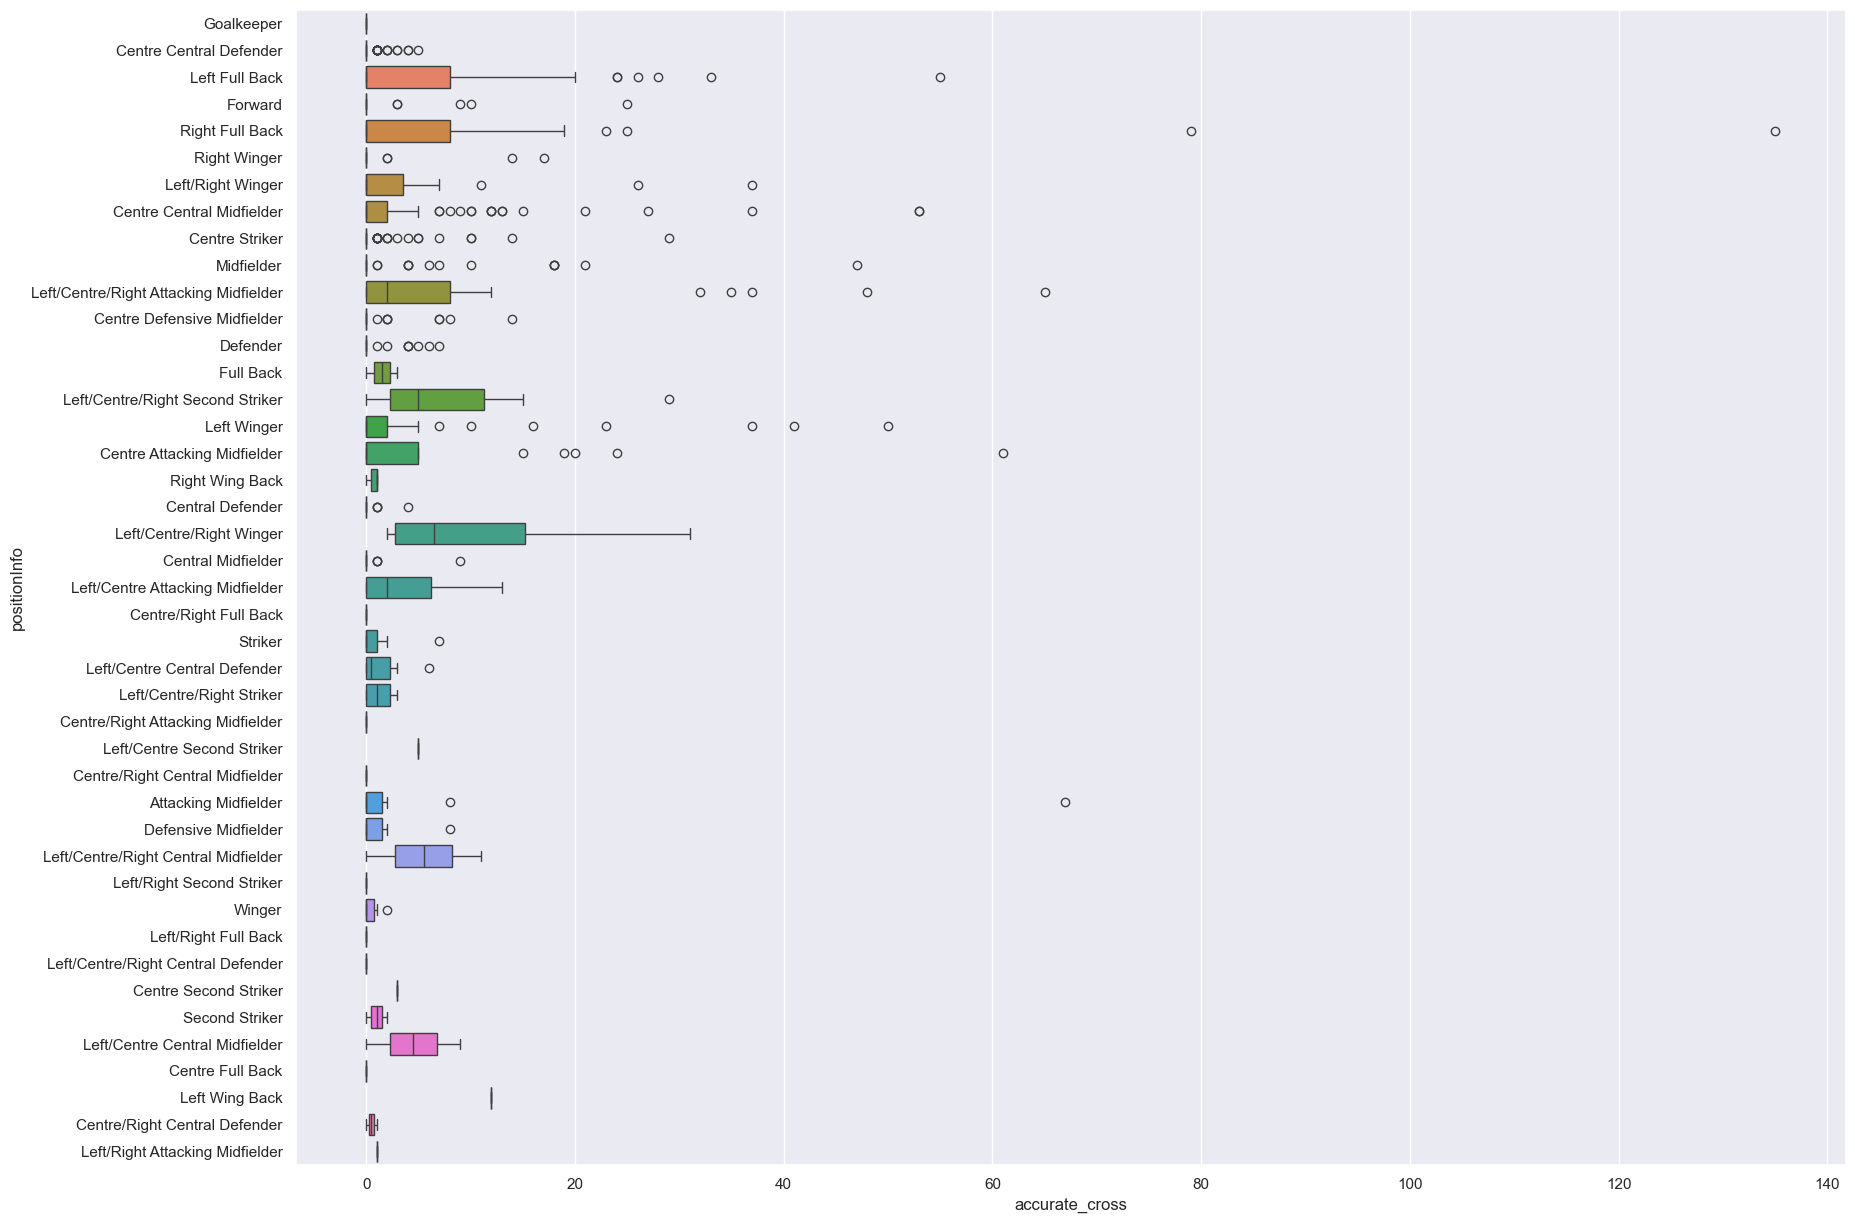

In [40]:
box_plot_on_position('accurate_cross', filter_type = "One Season", season='2022-23', position_info=True)

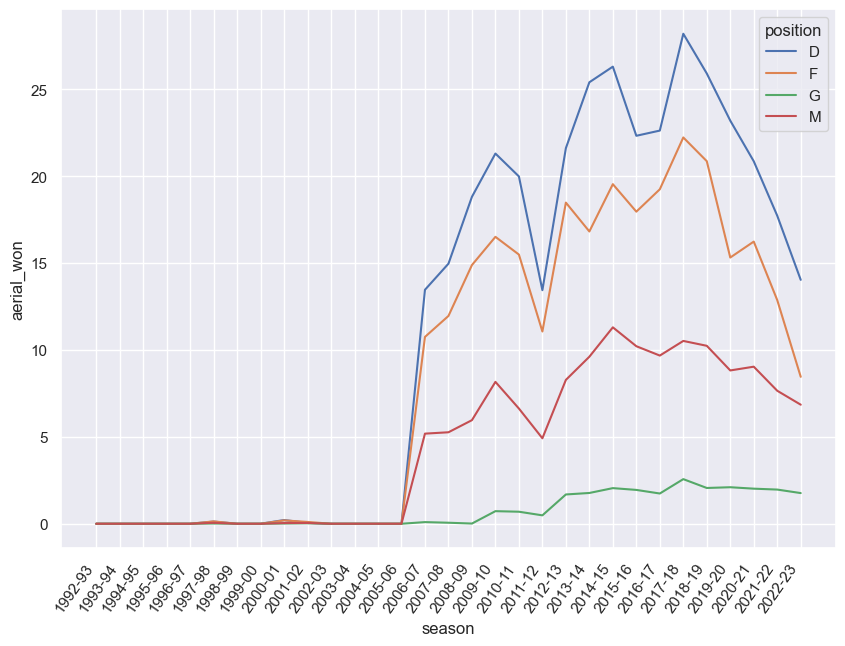

In [41]:
def line_plot_on_position(y, position_info=False):
    season_df = player_df[['season', 'position', y]]
    season_df = season_df.groupby(['season', 'position']).mean()
    plt.figure(figsize=(10,7))
    sns.lineplot(data=season_df, x='season', y=y, hue='position')
    plt.xticks(rotation=55, ha='right')
    plt.show()
    
line_plot_on_position('aerial_won')

# Player plot

In [42]:
player_df.loc[player_df['name'] == 'Cristiano Ronaldo']

,id,playerId,name,season,position,shirtNum,positionInfo,country,birth,age,...,att_lg_left,cross_not_claimed,dive_catch,att_obp_goal,att_pen_post,rescinded_red_card,total_distance_in_m,formation_place,att_rf_miss,att_lf_miss
763,2522.0,336621.0,Cristiano Ronaldo,2022-23,F,7.0,Centre Striker,Portugal,1985,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1786,2522.0,336621.0,Cristiano Ronaldo,2021-22,F,7.0,Centre Striker,Portugal,1985,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12553,2522.0,336621.0,Cristiano Ronaldo,2008-09,F,7.0,Centre Striker,Portugal,1985,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13328,2522.0,336621.0,Cristiano Ronaldo,2007-08,F,7.0,Centre Striker,Portugal,1985,22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,238.0,0.0,0.0
14071,2522.0,336621.0,Cristiano Ronaldo,2006-07,F,7.0,Centre Striker,Portugal,1985,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.0,0.0,0.0
14783,2522.0,336621.0,Cristiano Ronaldo,2005-06,F,7.0,Centre Striker,Portugal,1985,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15505,2522.0,336621.0,Cristiano Ronaldo,2004-05,F,7.0,Centre Striker,Portugal,1985,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16271,2522.0,336621.0,Cristiano Ronaldo,2003-04,F,7.0,Centre Striker,Portugal,1985,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\minhm\AppData\Local\Temp\ipykernel_33568\2737366047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player.sort_values('season', ascending=True, inplace=True)


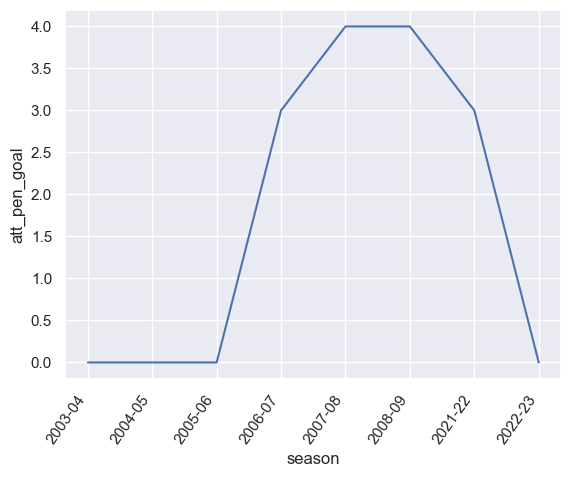

In [44]:
def line_plot_player_season(name, y):
    player = player_df.loc[player_df['name'] == name]
    player.sort_values('season', ascending=True, inplace=True)
    sns.lineplot(data=player, x='season', y=y)
    plt.xticks(rotation=55, ha='right')
    plt.show()
    
line_plot_player_season('Cristiano Ronaldo', 'att_pen_goal')